In [2]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv('fatalities.csv')

In [14]:
df.shape

(11124, 16)

In [15]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


## Basic important information 

In [41]:
citizenship_counts = df['citizenship'].value_counts()
event_location_region = df['event_location_region'].value_counts()
hostilities_counts = df[df['took_part_in_the_hostilities'] == 'Yes']['citizenship'].value_counts()
no_hostilities_counts = df[df['took_part_in_the_hostilities'] == 'No']['citizenship'].value_counts()

In [42]:
citizenship_counts

citizenship
Palestinian    10092
Israeli         1029
Jordanian          2
American           1
Name: count, dtype: int64

In [43]:
event_location_region

event_location_region
Gaza Strip    7733
West Bank     2712
Israel         679
Name: count, dtype: int64

In [44]:
hostilities_counts

citizenship
Palestinian    3466
Israeli           1
Name: count, dtype: int64

In [45]:
no_hostilities_counts

citizenship
Palestinian    4652
Jordanian         1
Name: count, dtype: int64

In [47]:
df['ammunition'].value_counts()

ammunition
missile                        2877
live ammunition                1514
shell                           675
explosive belt                  326
bomb                            249
mortar fire                      51
knife                            37
flechette shells                 22
rubber-coated metal bullets      19
0.22-caliber bullets             16
phosphorus shell                 16
Qassam rocket                    15
car bomb                         15
teargas canister                 13
rocket                           12
grad rocket                       7
sponge rounds                     2
grenade                           2
flare bomb                        1
stun grenade                      1
rock                              1
Name: count, dtype: int64

## Types of Fires

In [48]:
df['type_of_injury'].value_counts()

type_of_injury
gunfire                         9849
explosion                        555
shelling                         311
stabbing                          48
house demolition                  25
hit by a vehicle                  18
beating                            9
stones throwing                    6
being bludgeoned with an axe       4
fire                               4
physically assaulted               2
physical assault                   1
Strangulation                      1
Name: count, dtype: int64

<Axes: xlabel='gender'>

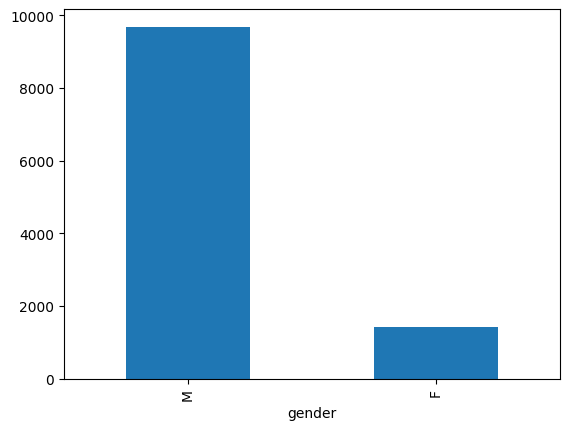

In [49]:
df['gender'].value_counts().plot(kind='bar')

## Calculate Summary Statisticsfor 'age'

In [50]:
df['age'].describe()

count    10995.000000
mean        26.745703
std         13.780548
min          1.000000
25%         19.000000
50%         23.000000
75%         31.000000
max        112.000000
Name: age, dtype: float64

## Group data by 'event location_region' and count incidents

<Axes: xlabel='event_location_region'>

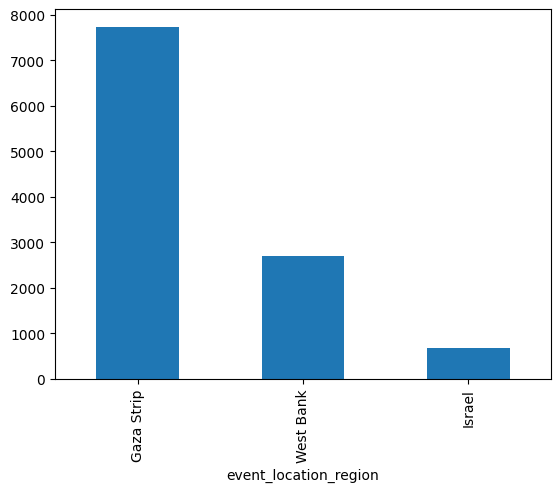

In [52]:
df['event_location_region'].value_counts().plot(kind='bar')

## Count unique Values of 'place_of_residence' within each region

<Axes: ylabel='place_of_residence'>

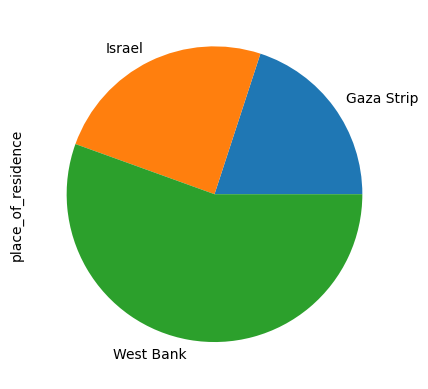

In [53]:
df.groupby('event_location_region')['place_of_residence'].nunique().plot(kind='pie')

# Calculate average age by 'event_location_region'

In [57]:
df.groupby('event_location_region')['age'].mean()

event_location_region
Gaza Strip    26.020224
Israel        36.286776
West Bank     26.421746
Name: age, dtype: float64

## Data Filtering Example: Incidents in a specific region with specifc characteristics

In [58]:
df.groupby('citizenship').size().reset_index(name='incident_count')

,citizenship,incident_count
0,American,1
1,Israeli,1029
2,Jordanian,2
3,Palestinian,10092
